# 4. Case Study - Summer Olympics

Untuk memperkuat keterampilan baru Anda, Anda akan menerapkannya pada studi kasus mendalam menggunakan data medali Olimpiade. Analisis ini melibatkan pengintegrasian keterampilan multi-DataFrame Anda dari kursus ini dan keterampilan yang Anda peroleh dalam kursus pandas sebelumnya. Ini adalah kumpulan data jumlah banyak yang akan memungkinkan Anda untuk sepenuhnya memanfaatkan keterampilan manipulasi data pandas Anda.

## Medals in the Summer Olympics

### Loading Olympic edition DataFrame

Dalam bab ini, Anda akan menggunakan [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

Tugas pertama Anda di sini adalah menyiapkan DataFrame `editions` dari file *tab-separated values* (TSV).

Awalnya, `editions` memiliki 26 baris (satu untuk setiap edisi Olimpiade, yaitu, tahun di mana Olimpiade diadakan) dan 7 kolom: `'Edition'`, `'Bronze'`, `'Gold'`, `'Silver'`, `'Grand Total'`, `'City'`, dan `'Country'`.

Untuk analisis selanjutnya, Anda tidak akan memerlukan jumlah medali keseluruhan, jadi Anda hanya ingin menjaga kolom yang berguna dari `editions` : `'Edition'`, `'Grand Total'`, `City`, dan `Country`.

In [3]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'datasets/olympic/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
editions

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


**Note** : Selanjutnya, Anda akan menyiapkan DataFrame kode IOC.

### Loading IOC codes DataFrame

Tugas Anda di sini adalah menyiapkan DataFrame `ioc_codes` dari file *comma separated values* (CSV).

Awalnya, `ioc_codes` memiliki 200 baris (satu untuk setiap negara) dan 3 kolom: `'Country'`, `'NOC'`, & `'ISO code'`.

Untuk analisis selanjutnya, Anda hanya ingin menyimpan kolom yang bermanfaat dari `ioc_codes`: `'Country'` dan `'NOC'` (kolom `'NOC'` berisi kode tiga huruf yang mewakili masing-masing negara).

In [6]:
# Create the file path: file_path
file_path = 'datasets/olympic/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


### Building medals DataFrame

Di sini, Anda akan mulai dengan DataFrame `editions` dari latihan sebelumnya.

Anda memiliki urutan file `summer_1896.csv`, `summer_1900.csv`, ..., `summer_2008.csv`, satu untuk setiap edisi Olimpiade (tahun).

Anda akan membangun dictionary `medals_dict` dengan edisi Olimpiade (tahun) sebagai kunci dan DataFrames sebagai nilai.

Dictionary ini dibangun di dalam loop selama masing-masing `year` edisi Olimpiade (dari Indeks `editions`).

Setelah dictionary DataFrames dibangun, Anda akan menggabungkan DataFrames menggunakan `pd.concat()`.

In [ ]:
# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

**Note** : Pada bagian ini sementara dilewati, karena file dataset yang ada sudah digabungkan semuannya. 

## Quantifying Performance

### Counting medals by country/edition in a pivot table

Anda dapat membuat tabel pivot untuk melihat jumlah medali yang dimenangkan setiap negara dalam setiap tahunnya. Hasilnya adalah DataFrame baru dengan edisi Olimpiade pada Indeks dan 138 kode negara `NOC` sebagai kolom.

**Relevant exercises** : [Manipulating DataFrames with pandas](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/rearranging-and-reshaping-data?ex=14).

In [19]:
# Create the file path: file_path
file_path = 'datasets/olympic/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'

# Load data
medals = pd.read_csv(file_path, sep='\t', header=4, usecols=['Athlete', 'NOC', 'Medal', 'Edition'])

In [22]:
medals.head()

,Edition,Athlete,NOC,Medal
0,1896,"HAJOS, Alfred",HUN,Gold
1,1896,"HERSCHMANN, Otto",AUT,Silver
2,1896,"DRIVAS, Dimitrios",GRE,Bronze
3,1896,"MALOKINIS, Ioannis",GRE,Gold
4,1896,"CHASAPIS, Spiridon",GRE,Silver


In [24]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

In [25]:
# Print the first 5 rows of medal_counts
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Print the last 5 rows of medal_counts
medal_counts.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,2.0,NaN,2.0,NaN,57.0,6.0,NaN,1.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,3.0,NaN,20.0,2.0,132.0,3.0,1.0,5.0,...,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN,NaN
2000,NaN,NaN,5.0,NaN,20.0,1.0,183.0,4.0,3.0,6.0,...,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,...,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0,NaN
2008,1.0,NaN,2.0,NaN,51.0,6.0,149.0,3.0,7.0,5.0,...,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0,NaN


**Note** : Seperti yang Anda lihat, tabel pivot DataFrame memiliki sebagian besar entri `NaN` (karena sebagian besar negara tidak memenangkan medali apa pun dalam edisi Olimpiade tertentu).

### Computing fraction of medals per Olympic edition

**DATA** : `editions`, `medals`, & `medal_counts`.

Anda dapat mengekstrak Series dengan jumlah total medali yang diberikan di setiap edisi Olimpiade.

DataFrame `medal_counts` dapat dibagi berdasarkan baris dengan jumlah total medali yang diberikan setiap edisi; metode `.divide()` melakukan broadcast seperti yang Anda butuhkan.

Ini memberi Anda indikasi yang dinormalisasi dari kinerja masing-masing negara di setiap edisi.

In [27]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  ...  \
Edition                                                                   ...   
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN  ...   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN  ...   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN  ...   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN  ...   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN  ...   

NOC      URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition                                                              
1896     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN       NaN  
1912     NaN

### Computing percentage change in fraction of medals won

**DATA** : `editions`, `medals`, `medal_counts` & `fractions`.

Untuk melihat apakah ada keuntungan negara tuan rumah, Anda pertama-tama ingin melihat bagaimana fraction medali memenangkan perubahan dari edisi ke edisi.

Ekspansi rata-rata menyediakan cara untuk melihat ini di setiap kolom. Ini adalah nilai mean dengan semua data tersedia hingga saat itu. Jika Anda tertarik untuk mempelajari lebih lanjut tentang transformasi pandas yang berkembang, bagian [dokumentasi pandas](http://pandas.pydata.org/pandas-docs/stable/computation.html#expanding-windows) ini memiliki informasi tambahan.

In [28]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC  ...  URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0    ...  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1    ...  NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2    ...  NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3    ...  NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4    ...  NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AHO        ALG  ANZ       ARG        A

## Reshaping and plotting

### Building hosts DataFrame

Tugas Anda di sini adalah menyiapkan DataFrame `hosts` dengan menyatukan `editions` dan `ioc_codes`menggunakan *left join*.

Setelah dibuat, Anda akan mengelompokkan kolom `Edition` dan `NOC`, serta menetapkan `Edition` sebagai Indeks.

Ada beberapa nilai `NOC` yang hilang; Anda akan mengaturnya secara eksplisit.

Akhirnya, Anda akan mengatur ulang Indeks & mencetak DataFrame akhir.

In [29]:
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


**Note** : Anda sekarang memiliki DataFrame yang terdiri dari semua host.

### Reshaping for analysis

Latihan ini dimulai dengan data `fractions_change` dan `hosts`.

Tugas Anda di sini adalah untuk membentuk kembali DataFrame `fractions_change` untuk analisis nanti.

Awalnya, `fractions_change` adalah DataFrame luas dengan 26 baris (satu untuk setiap edisi Olimpiade) dan 139 kolom (satu untuk edisi dan 138 untuk negara-negara yang berkompetisi).

Pada *reshaping* dengan `pd.melt()`, seperti yang akan Anda lihat, hasilnya adalah DataFrame yang panjang dengan 3588 baris dan 3 kolom yang merangkum perubahan fraksional dalam rata-rata yang meluas dari persentase medali yang dimenangkan untuk setiap negara dalam blok.

In [30]:
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


**Note** : Saat melihat negara-negara tuan rumah dari 5 edisi Olimpiade terakhir dan perubahan fractional medali yang dimenangkan oleh China dalam 5 edisi terakhir, Anda dapat melihat bahwa China bernasib lebih baik secara signifikan pada tahun 2008 (mis., Ketika Cina adalah negara tuan rumah).

In [31]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


**Note** : Akan jauh lebih informatif untuk memvisualisasikan hasil ini. Inilah yang akan Anda lakukan pada latihan selanjutnya!

### Plotting influence of host country

Latihan terakhir ini dimulai dengan DataFrames `influence` dan `editions`. Tugas Anda adalah memplot influence menjadi negara tuan rumah.

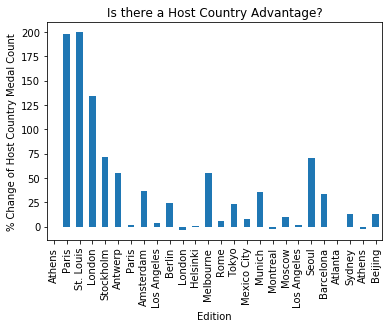

In [32]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()

**Note** : Apa yang Anda pikirkan - apakah ada keuntungan negara tuan rumah?